In [ ]:
#Story Telling with Data Visualisation

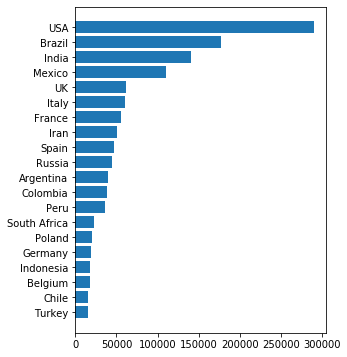

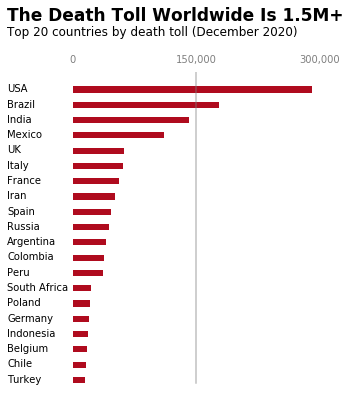

In [5]:
#we want to include a graph in the article that shows the top 20 countries by the number of deaths.

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#Here we will read data straight from the download link
#death_toll = pd.read_csv("https://dsserver-prod-resources-1.s3.amazonaws.com:443/525/top20_deathtoll.csv?versionId=oOhYs1G.mb3GLxdBMDi17lhr4lrxbMhe")


# plt.barh(death_toll['Country_Other'],death_toll['Total_Deaths'])
# plt.title('Covid19 cases by Country')
# plt.show()

#Now we will learn how to make this chart more attractive.

#To make the changes we want, we'll use matplotlib's object-oriented interface. Matplotlib has two interfaces:

#A functional interface: we use functions to create and modify plots. e.g plt.scatter(), plt.plot()
#An object-oriented (OO) interface: we use methods to create and modify plots.
#The functional interface is simpler and easier to use. It comes in handy in the exploratory data visualization workflow, where we need to create graphs fast. But the OO interface offers more power and flexibility in graph editing.

#To create a graph using the OO interface, we use the plt.subplots() function, which generates an empty plot and returns a tuple of two objects:

#plt.subplots()

#We assign the two objects inside the tuple to variables fig and ax
# fig, ax = plt.subplots()
# print(type(fig))
# print(type(ax))

#The matplotlib.figure.Figure object acts as a canvas on which we can add one or more plots.
#The matplotlib.axes._subplots.AxesSubplot object is the actual plot
#we have two objects:

#The Figure (the canvas)
#The Axes (the plot; don't confuse with "axis," which is the x- and y-axis of a plot).

#Lets try an example, if we want to plot a barchart using this object oriented methong

# fig,ax=plt.subplots()
# ax.bar(['a','b','c','d'],[1,2,3,4])
# plt.show()

#Now lets use this OO Methd to create the plot for death toll

# fig, ax = plt.subplots(figsize=(4.5,6))
# ax.barh(death_toll['Country_Other'], death_toll['Total_Deaths'])
# plt.show()

#Now lets remove the axes and the ticks
#To remove the axes (also called spines), we can use the Axes.spines[position].set_visible(bool) method, where position is a string indicating the location of the axis: 'left', 'right', 'top', and 'bottom'
#To remove the ticks, we can use the Axes.tick_params(bottom, top, left, right) method.
# fig, ax = plt.subplots(figsize=(4.5,6))
# ax.barh(death_toll['Country_Other'], death_toll['Total_Deaths'],height=0.1) #The height param is used to reduce the bar thickness
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.tick_params(bottom=False,left=False)
# ax.set_xticks([0,100000,200000,300000]) #This is used to reduce the ticks to only 3
# plt.show()

#One problem with our graph is that the tick labels are located at the bottom. People will immediately see the country names, the bars, but they may get confused about the quantities.

#To address that, we're going to move the tick labels at the top of the graph using the Axes.xaxis.tick_top() method:
# fig, ax = plt.subplots(figsize=(4.5,6))
# ax.barh(death_toll['Country_Other'], death_toll['Total_Deaths'],height=0.4, color='#af0b1e') #The height param is used to reduce the bar thickness, the color is to change the color of the bars
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.xaxis.tick_top() #Now that it is on top, we have to remmove the top ticks in line below
# ax.tick_params(left=False, top=False) #I noticed I had to put this after the tick_top, if not, the ticks will still show.
# ax.tick_params(axis='x',colors='grey') #To grey out the labels
# ax.set_xticks([0,150000,300000]) #This is used to reduce the ticks to only 3
# ax.set_xticklabels(['0', '150,000', '300,000'])
# ax.text(x=-80000,y=23.5,s='The Death Toll Worldwide Is 1.5M+',size=17,weight='bold')
# ax.text(x=-80000,y=22.5,s='Top 20 countries by death toll (December 2020)',size=12)
# # I want to left align the y tick labels
# #First we remove all the labels in the code below
# ax.set_yticklabels([]) # an empty list removes the labels
# #Now we will use the following code to left align
# country_names = death_toll['Country_Other']
# for i, country in zip(range(20), country_names):
#     ax.text(x=-80000, y=i-0.15, s=country) #x and y are the positions, while s is the text
    
#Readers who explore the graph will try to determine the approximate death toll for each country.
#To help them, we're going to draw a vertical line below the 150,000 value. 
#To do that, we use the Axes.axvline(x) method, where x is the x-coordinate where the line begins:
# ax.axvline(x=150000, ymin=0.045,c='grey', alpha=0.5)
#he ymin parameter to make it shorter — where 0 is the bottom of the plot, and 1 is the top of the plot.
#The c parameter to change the color to 'grey'
#he alpha parameter to add transparency to the line.
#x is the x-coordinate where the line begins:

#plt.show()

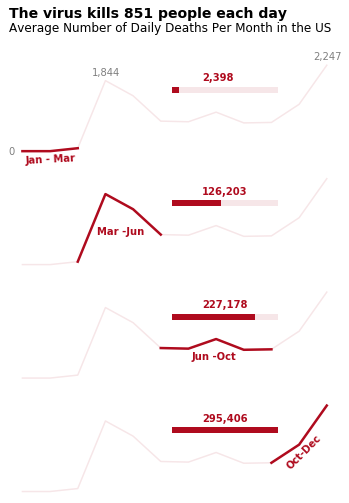

In [46]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


#covid_avg = pd.read_csv("https://dsserver-prod-resources-1.s3.amazonaws.com:443/526/covid_avg_deaths.csv?versionId=AVTtHJNFLCZ464sTwkQmzEx2ZFleuHcw")
#print(covid_avg.head())
#print(covid_avg.info())

#We begin with creating a grid chart of four rows by one column using the plt.subplots() function.
#We also adjust the figure size to (6, 8) since we want to keep a mobile-friendly ratio

#fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (6,8))
# The above The function returns two objects: a Figure and an array of four Axes objects. 
#We use (ax1, ax2, ax3, ax4) to assign each object within that array to a different variable.
#o draw on the individual plots, we can use Matplotlib methods on each of the four Axes objects
#we'll draw the four line plots that show the evolution of average daily deaths per month in 2020

#In our story telling plots, we want to highlight the 4 quarters of the year (jan - mar, apr - jun etc)
#To highlight these four periods, we begin by coloring all plots in a shade of red. Then, we increase their transparency by using the alpha parameter.
# axes = [ax1,ax2,ax3,ax4]
# for ax in axes:
#     ax.plot(covid_avg['Month'], covid_avg['New_deaths'], color = '#af0b1e', alpha = 0.1)
    #Now, we draw separate line plots on top of the current ones. 
    #We begin by drawing the first one — we use the same color and increase the line width using the linewidth parameter.
#     pos = ['left','right','top','bottom']
#     for char in pos:
#         ax.spines[char].set_visible(False)
#     ax.tick_params(left=False, bottom=False)
#     ax.set_yticklabels([])
#     ax.set_xticklabels([])
# ax1.plot(covid_avg['Month'][:3],covid_avg['New_deaths'][:3],color='#af0b1e', linewidth=2.5) #Jan to March
# ax2.plot(covid_avg['Month'][2:6],covid_avg['New_deaths'][2:6],color='#af0b1e', linewidth=2.5)#March to June
# ax3.plot(covid_avg['Month'][5:10],covid_avg['New_deaths'][5:10],color='#af0b1e', linewidth=2.5) #June to October
# ax4.plot(covid_avg['Month'][9:12],covid_avg['New_deaths'][9:12],color='#af0b1e', linewidth=2.5)#October to dec

#First, we're going to show the quantities by adding three labels on the first plot
# #we do this using the Axis.text() method. We arrived at the exact x- and y-coordinates you see below through a process of trial and error.
# ax1.text(0.5, -80, '0', alpha=0.5)
# ax1.text(3.5, 2000, '1,844', alpha=0.5)
# ax1.text(11.5, 2400, '2,247', alpha=0.5)
# ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',weight='bold', rotation=3)
# ax2.text(3.7,800,'Mar -Jun',color='#af0b1e',weight='bold')
# ax3.text(7.1,500,'Jun -Oct',color='#af0b1e',weight='bold')
# ax4.text(10.5,600,'Oct-Dec',color='#af0b1e',weight='bold', rotation = 45)
#Now we will add subtitle & title
#ax1.text(0.5,3500,'The virus kills 851 people each day',size=14, weight='bold')
#ax1.text(0.5,3150,'Average Number of Daily Deaths Per Month in the US',size=12)
#Now we will use somematplotlib functions to create a progress bar
#A progress bar is made of two rectangles. The rectangles are different colors.
#the one with a darker shade is put on top of the other — this creates a visual sense of progress.
#To create a rectangle in Matplotlib, we can draw a thick horizontal line. 
#To draw a horizontal line, we can use the Axes.axhline() method. 
#The y parameter specifies the y-coordinate of the horizontal line.
# ax1.axhline(y=1600, xmin=0.5, xmax=0.8,linewidth=6, color='#af0b1e', alpha=0.1)
# ax2.axhline(y=1600, xmin=0.5, xmax=0.8,linewidth=6, color='#af0b1e', alpha=0.1)
# ax3.axhline(y=1600, xmin=0.5, xmax=0.8,linewidth=6, color='#af0b1e', alpha=0.1)
# ax4.axhline(y=1600, xmin=0.5, xmax=0.8,linewidth=6, color='#af0b1e', alpha=0.1)

#Now we need to create the rectangle that will indiate the progrss bar
#deaths = [2398, 126203, 227178, 295406] #This gives cum death at the end of mar,june,oct & dec respectively
#proportions = [round(death/295406, 2) for death in deaths] #he proportion of deaths for each of those months relative to the current death toll
#xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions] #the values we'll need to use for the xmax parameter of Axes.axhline() to control its length. 
#We multiplied each proportion by 0.3 because xmax - xmin = 0.8 - 0.5 = 0.3
#for ax, xmax in zip(axes, xmax_vals):
    #ax.axhline(y=1600, xmin=0.5, xmax=xmax,linewidth=6, color='#af0b1e')
#Now let's add the text above the progress bars
#for death,ax in zip(deaths,axes):
    #ax.text(7.5,1850,format(death,','),color='#af0b1e',weight='bold')
#plt.show()

In [ ]:
#Matplotlib Styles: FiveThirtyEight Case Study

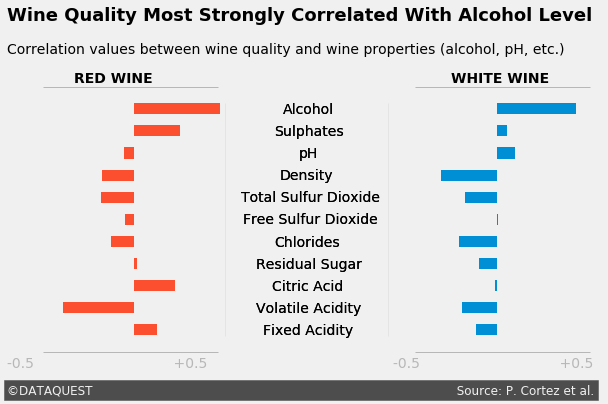

In [4]:
#Matplotlib's pre-defined styles change the default visual properties of graphs.
#To use these styles you have to import the library from matplotlib

import pandas as pd
from matplotlib import pyplot as plt, style as style  #You can import different sub modules on the same line

#style.use('Solarize_Light2')
#We must use the style.use() function before we create the graph — before calling the plt.plot() function.
#plt.plot([1, 2, 3], [5, 2, 7])
#plt.show()
#After we call style.use('Solarize_Light2'), all subsequent graphs will inherit this style.
#To get back to the default settings, we need to use style.use('default').
#style.use('default')
#plt.plot([1, 2, 3], [5, 2, 7])
#plt.show()

#If you want to switch between different styles, use style.use('default') between each change — some of the styles can interfere with one another.
#We can see all the available styles by accessing the style.available attribute.
#print(style.available)

#Now we will practice using the fivethirtyeight style on 2 sets of data file

red_wine = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/528/winequality-red.csv?versionId=VAbmP9.YUb39PgLsN2vh.qeg_MKuiTRI', sep =';')
white_wine = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/528/winequality-white.csv?versionId=_rpANa4MYLzkjBBcMMpikwxwBKl73sDs', sep = ';')

# print(red_wine.head())
# print(red_wine.info())
# print(white_wine.head())
# print(white_wine.info())

#Let's determine what attributes have the strongest correlation with quality
red_corr = red_wine.corr()['quality'][:-1]
white_corr = white_wine.corr()['quality'][:-1]



#Now that we have found the correlation values for the two type of wines, we want to represent this in a bar plot
#Now lets create two horizontal bar plots with fivethirtyeight style

# style.use('fivethirtyeight')
# fig,ax = plt.subplots(figsize=(9,5))
# ax.barh(white_corr.index,white_corr)
# ax.barh(red_corr.index,red_corr)
# plt.show()

#from the above, Matplotlib built two different bar plots. It's not clear which is which, though.
#To separate them, we're going to move the white wine plot to the right side of the graph. To do that, we can use the left parameter of the Axes.barh() method.
#his parameter moves the left sides of the bars from their default x-coordinate of 0.
#In our case, left=2 moves them from 0 to 2 (for bars representing negative quantities, the right sides move from 0 to 2).

style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(9,5))
ax.barh(white_corr.index,white_corr, left = 2, height = 0.5)
ax.barh(red_corr.index,red_corr, height=0.5)
#we will remove the grid of the graph
ax.grid(b=False)
#remove the x and y ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])

#We add y-tick labels in the center of the graph — both bar plots have the same y-tick labels.
#Below, we add the labels using Axes.text() and specify the coordinates manually.
x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
#To visually separate the labels from the bar plots, we're going to add two vertical lines.
#one to the left of the labels column, and the other to the right, like this:
ax.axvline(x=0.5, ymin=0.1,ymax=0.9,c='grey', alpha=0.1,linewidth=1)
ax.axvline(x=1.4, ymin=0.1,ymax=0.9,c='grey', alpha=0.1,linewidth=1)

x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
# now we will add an horizontl line below each bar plot
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.01, xmax=0.32)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.67, xmax=0.98)

#All correlations range between -0.5 and +0.5, and we're going to use these two values as extremes.
#We're going to add these values as x-tick labels under each horizontal line.
#Below, note that we also use string concatenation (and ' '*31 means 31 space characters).
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',color='grey', alpha=0.5)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',color='grey', alpha=0.5)
ax.axhline(y=11, color='grey',linewidth=1,alpha=0.5,xmin=0.01,xmax=0.32)
ax.text(-0.33, 11.2, 'RED WINE', weight = 'bold')
ax.axhline(y=11, color='grey',linewidth=1,alpha=0.5,xmin=0.67,xmax=0.98)
ax.text(1.75, 11.2, 'WHITE WINE', weight = 'bold')
#One way to draw a signature bar is to add text with a dark background color. 
#Below, we add the text ©DATAQUEST Source: P. Cortez et al. with a background color of #4d4d4d (a shade of grey). 
#The text itself has the color #f0f0f0, which is the same as the graph's background color.

ax.text(-0.7,-2.9,'©DATAQUEST' + ' '*94 + 'Source: P. Cortez et al.',color='#f0f0f0',backgroundcolor='#4d4d4d',size=12)
ax.text(-0.7,14,'Wine Quality Most Strongly Correlated With Alcohol Level',weight='bold',size=18)
ax.text(-0.7,12.5,'Correlation values between wine quality and wine properties (alcohol, pH, etc.)',size=14)
plt.show()
